In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('SaYoPillow.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [2]:
data.rename(columns={'sr': 'snoring_rate', 'rr':'respiration_rate', 't': 'body_temperature', 'lm':'limb_movement',
                            'bo':'blood_oxygen', 'rem':'eye_movement', 'sr.1':'sleepinghours', 'hr':'heartrate',
                            'sl':'stresslevel'}, inplace=True)
data.columns

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleepinghours', 'heartrate',
       'stresslevel'],
      dtype='object')

In [25]:
data.rename(columns = {'s':'sh'}, inplace=True)

In [26]:
data.rename(columns = {'sr.1':'sh'}, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleepinghours     630 non-null    float64
 7   heartrate         630 non-null    float64
 8   stresslevel       630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [28]:
data.shape

(630, 9)

In [29]:
data['stresslevel'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stresslevel, dtype: int64

<AxesSubplot:xlabel='stresslevel', ylabel='count'>

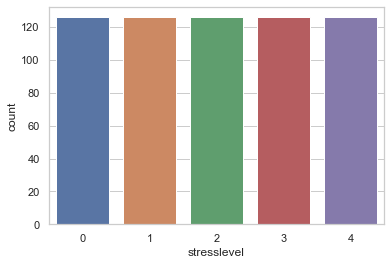

In [30]:
sns.set(style="whitegrid")
sns.countplot(x='stresslevel', data=data)

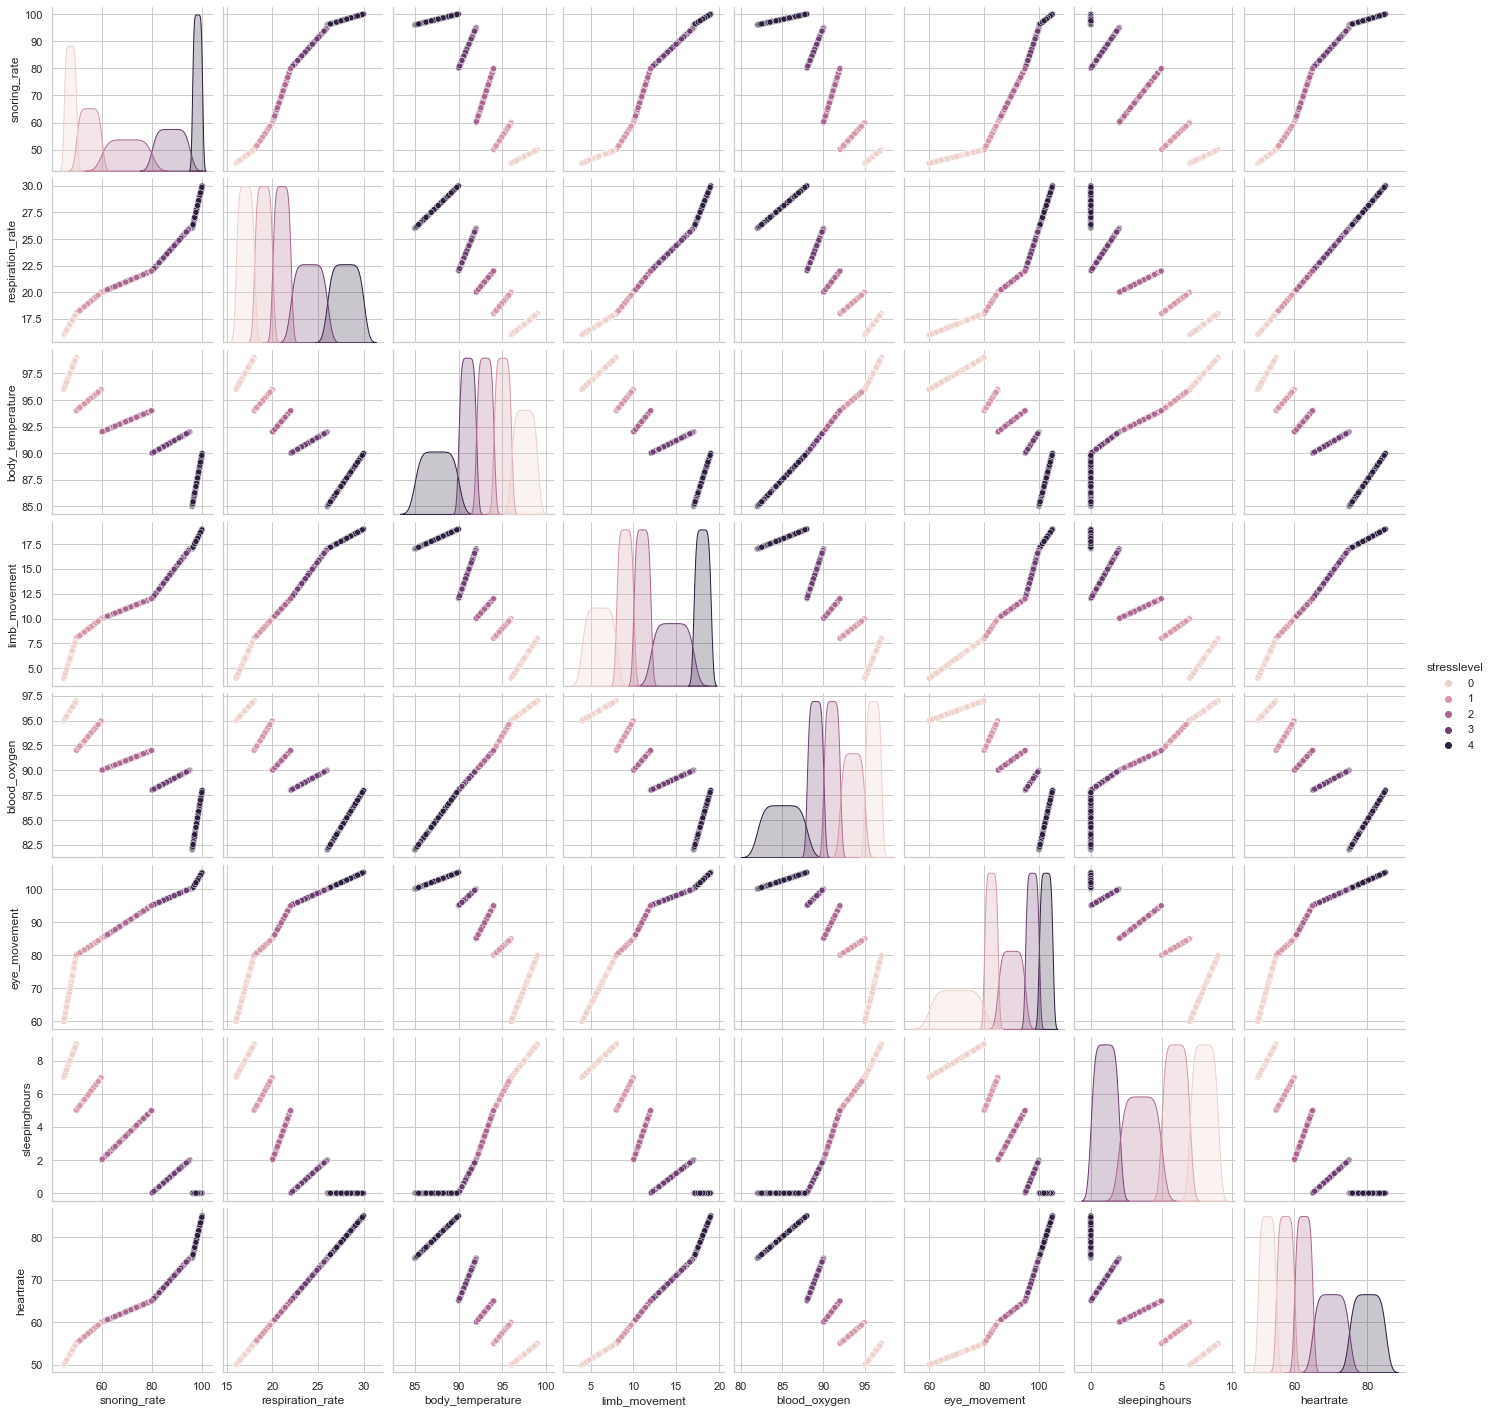

In [31]:
sns.pairplot(data, hue='stresslevel');


Text(0, 0.5, 'Sleeping hours')

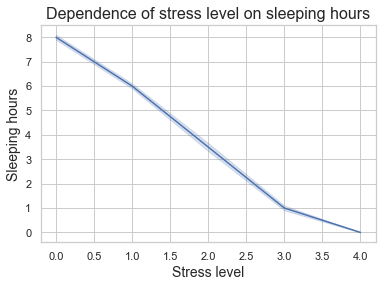

In [32]:
import seaborn as sns
sleep_hours_plot = sns.lineplot(data=data, x='stresslevel',y='sleepinghours')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleeping hours", fontsize=16)
sleep_hours_plot.set_xlabel("Stress level", fontsize=14)
sleep_hours_plot.set_ylabel("Sleeping hours", fontsize=14)

Text(0, 0.5, 'Heart rate')

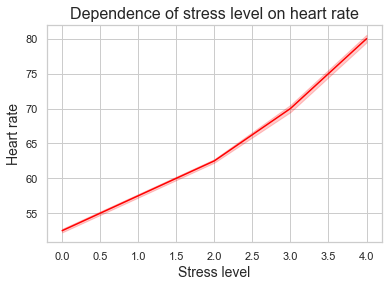

In [33]:
heart_rate_plot = sns.lineplot(data=data, x='stresslevel',y='heartrate', color='red')
heart_rate_plot.axes.set_title("Dependence of stress level on heart rate", fontsize=16)
heart_rate_plot.set_xlabel("Stress level", fontsize=14)
heart_rate_plot.set_ylabel("Heart rate", fontsize=14)

Text(0, 0.5, 'Blood oxygen')

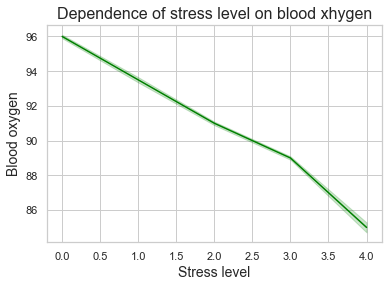

In [34]:
blood_oxygen_plot = sns.lineplot(data=data, x='stresslevel',y='blood_oxygen', color='green')
blood_oxygen_plot.axes.set_title("Dependence of stress level on blood xhygen", fontsize=16)
blood_oxygen_plot.set_xlabel("Stress level", fontsize=14)
blood_oxygen_plot.set_ylabel("Blood oxygen", fontsize=14)

In [35]:
print("Average amount of sleep (median):",data.sleepinghours.median())

Average amount of sleep (median): 3.5


In [36]:
print("Average amount of stress (median):",data.stresslevel.median())

Average amount of stress (median): 2.0


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [38]:
X = data.drop(columns='stresslevel')
y = data.stresslevel

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5,random_state=42)

In [40]:
clf = GradientBoostingClassifier(n_estimators=20, random_state = 0)

In [41]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=0)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
y_pre = clf.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pre)
print("MSE: %.4f" % mse)
 
mae = mean_absolute_error(y_test, y_pre)
print("MAE: %.4f" % mae)
 
R2 = r2_score(y_test,y_pre)
print("R2: %.4f" % R2)

MSE: 0.0159
MAE: 0.0159
R2: 0.9918


In [45]:
print(f"Score: {clf.score(X_test, y_test)}")

Score: 0.9841269841269841


In [46]:
Mental Health Stress Detection

SyntaxError: invalid syntax (1916673114.py, line 1)

In [47]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [48]:
data = pd.read_csv('stress.csv')
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [49]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

In [50]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["text"] = data["text"].apply(clean)

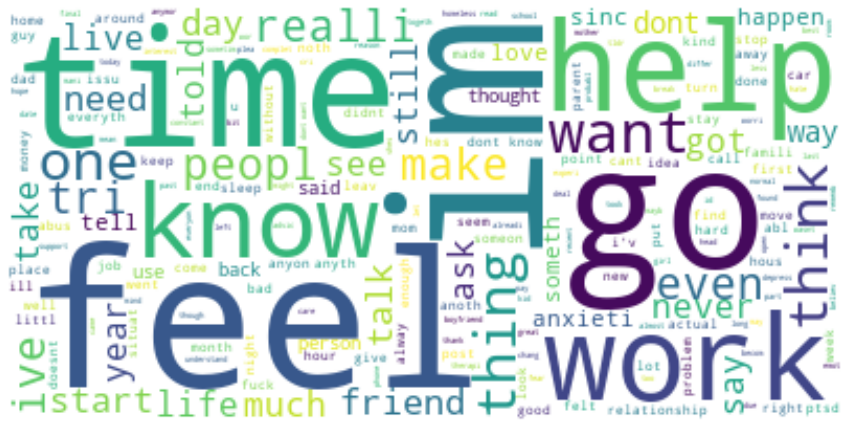

In [51]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, 
                      background_color = "white").generate(text)
plt.figure( figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [52]:
data['label'] = data['label'].map({0: 'No Stress', 1: 'Stress'})
data = data[['text', 'label']]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
x = np.array(data["text"])
y = np.array(data["label"])
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [54]:
model = BernoulliNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.7470651013874067


In [57]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: said felt way sugget go rest trigger ahead you.
['Stress']
